In [1]:
%matplotlib inline

import os
import utils
import re
import nltk
import json
import gensim
import dateutil
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from utils import metrics
import advertools as adv
from scipy import sparse
from functools import reduce
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from IPython.display import Image
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from typing import List, Callable, Dict
# from googletrans import Translator
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score
sns.set(style="ticks", color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from utils import Feature_Extraction
from utils import hyperparameterTuning_MLP
from utils import hyperparameterTuning_XGBoost
from utils import hyperparameterTuning_RandomForest
from utils import removeColumnContainString
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import sys

random_state=2022

ModuleNotFoundError: No module named 'seaborn'

In [8]:
figurePath=utils.folderPath('SavedFigures')
datasetePath=utils.folderPath('Dataset')  

1
1


In [10]:
dataset1='C:\\Users\\jyoti\\Desktop\\NLP\\NLP_project\\NLP-project-\\Models\\Dataset\\'

In [11]:
df=pd.read_csv(dataset1 + '2.csv')

In [12]:
df

,Unnamed: 0,caption,following,likes,posts_count,followers,INDUSTRY_childcare,INDUSTRY_cosmetics,INDUSTRY_fashion,INDUSTRY_fitness,...,INDUSTRY_retail,INDUSTRY_sport & recreation,Hod,mon,tue,wed,thu,fri,sat,sun
0,0,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,0,1,0,0,...,0,0,11,1,0,0,0,0,0,0
1,1,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,0,1,0,0,...,0,0,15,0,0,0,1,0,0,0
2,2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,0,0,0,0,...,0,0,18,0,0,0,0,0,1,0
3,3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,0,0,0,0,...,0,0,21,1,0,0,0,0,0,0
4,4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,0,0,0,0,...,0,0,19,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,41736,"Alongside hospitality, the performing arts hav...",599.0,4079.0,1933.0,167394.0,0,0,0,0,...,0,0,18,0,0,0,0,1,0,0
41737,41737,This! Isn’t this what we are looking forward ...,599.0,1621.0,1933.0,167394.0,0,0,0,0,...,0,0,15,0,0,1,0,0,0,0
41738,41738,"For those of you who are missing London town, ...",599.0,1548.0,1933.0,167394.0,0,0,0,0,...,0,0,13,1,0,0,0,0,0,0
41739,41739,While we’re closed we’re going to try and keep...,599.0,2637.0,1933.0,167394.0,0,0,0,0,...,0,0,14,0,0,1,0,0,0,0


In [13]:
df.drop(['Unnamed: 0'], axis = 1,inplace=True)

In [14]:
data=df.astype(str)

In [15]:
type(data['caption'])

pandas.core.series.Series

In [16]:
def sentiment_analysis(caption):
    def getSubjectivity(text):
        return TextBlob(text).sentiment.subjectivity
  
    #Create a function to get the polarity
    def getPolarity(caption):
        return TextBlob(caption).sentiment.polarity
  
    #Create two new columns 'Subjectivity' & 'Polarity'
    data['TextBlob_Subjectivity'] =    data['caption'].apply(getSubjectivity)
    data ['TextBlob_Polarity'] = data['caption'].apply(getPolarity)
    return data

sentiment_analysis(data['caption'])

In [ ]:
hashtag_summary = adv.extract_hashtags(data['caption'])
hashtag_summary.keys()
hashtag_summary['top_hashtags'][:10]

[('#london', 2955),
 ('#plasticsurgery', 2074),
 ('#cosmeticsurgery', 1635),
 ('#edinburgh', 1334),
 ('#plasticsurgeon', 1179),
 ('#beforeandafter', 1019),
 ('#skincare', 950),
 ('#beauty', 947),
 ('#breastaugmentation', 946),
 ('#aesthetics', 921)]

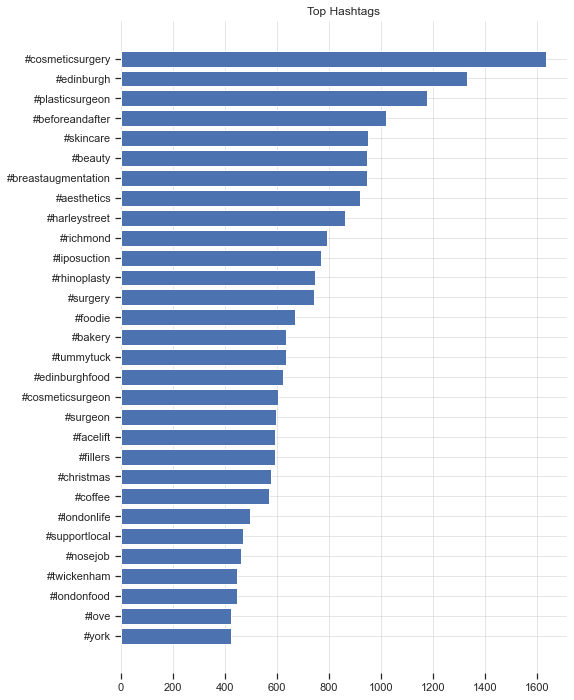

In [ ]:
plt.figure(facecolor='white', figsize=(8, 12))
plt.barh([x[0] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1],
         [x[1] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1])
plt.title('Top Hashtags')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [ ]:
emoji_summary = adv.extract_emoji(data['caption'])
emoji_summary.keys()
emoji_summary['top_emoji'][:10]

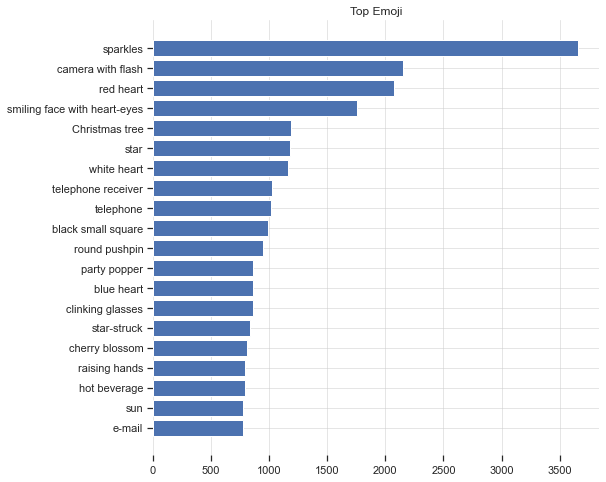

In [ ]:
plt.figure(facecolor='white', figsize=(8, 8))
plt.barh([x[0] for x in emoji_summary['top_emoji_text'][:20]][::-1],
         [x[1] for x in emoji_summary['top_emoji_text'][:20]][::-1])
plt.title('Top Emoji')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [ ]:
mention_summary = adv.extract_mentions(data['caption'])
mention_summary.keys()
mentions=mention_summary['top_mentions'][:10]

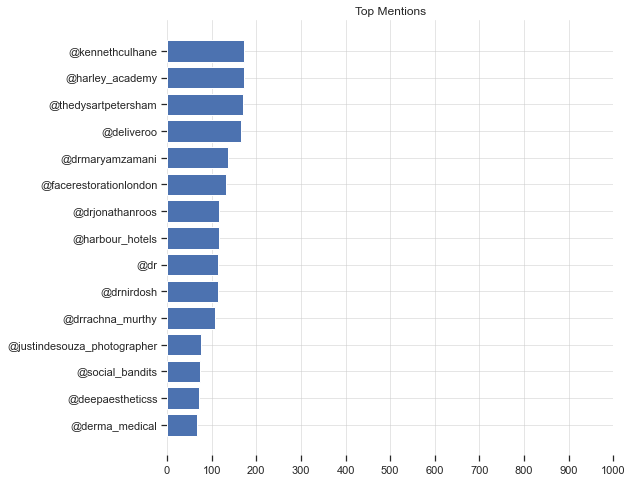

In [ ]:
plt.figure(facecolor='white', figsize=(8, 8))
plt.barh([x[0] for x in mention_summary['top_mentions'][:15]][::-1],
         [x[1] for x in mention_summary['top_mentions'][:15]][::-1])
plt.title('Top Mentions')
plt.grid(alpha=0.5)
plt.xticks(range(0, 1100, 100))
plt.gca().set_frame_on(False)

In [ ]:
extracted =  (data.assign(hashtags=hashtag_summary['hashtags'],
         hashcounts=hashtag_summary['hashtag_counts'],
         mentions=mention_summary['mentions'],
         mention_count=mention_summary['mention_counts'],
        emoji=emoji_summary['emoji'],
        emoji_text=emoji_summary['emoji_text'],
        emoji_count=emoji_summary['emoji_counts'] 
         ))


extracted.head(5)

,caption,following,likes,posts_count,followers,INDUSTRY_childcare,INDUSTRY_cosmetics,INDUSTRY_fashion,INDUSTRY_fitness,INDUSTRY_hospitality,...,sun,TextBlob_Subjectivity,TextBlob_Polarity,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count
0,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,0,1,0,0,0,...,0,0.632390,0.282576,"[#londontesting, #chelseabridgeclinic, #london...",8,[],0,"[⏱, 📄, 🧑🏻‍⚕️, 👨‍👩‍👧‍👦, 👫, 🧑‍💻, 🤍, 📌, 🦠, 🤝]","[stopwatch, page facing up, health worker: lig...",10
1,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,0,1,0,0,0,...,0,0.405556,0.168056,"[#thankyou, #thankful, #feedback, #chlseabridg...",9,[],0,"[👏, 🧡]","[clapping hands, orange heart]",2
2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,0,0,0,0,1,...,0,0.000000,0.000000,"[#edinburghfoodies, #edinburghrestaurants, #nu...",25,[],0,[],[],0
3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,0,0,0,0,1,...,0,0.333333,0.250000,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,[],0,[],[],0
4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,0,0,0,0,1,...,0,0.333333,0.166667,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,"[@castlegamescotland, @wellocksfood]",2,[],[],0


In [ ]:
def captionLength(i):
    return len(i)

caption_length = extracted['caption'].apply(captionLength)
extracted['caption_length'] = caption_length

In [ ]:
#Converting the columns into the float datatype
a=['followers']
for i in a:
  extracted[i]= extracted[i].astype(str).astype(float)
extracted

,caption,following,likes,posts_count,followers,INDUSTRY_childcare,INDUSTRY_cosmetics,INDUSTRY_fashion,INDUSTRY_fitness,INDUSTRY_hospitality,...,TextBlob_Subjectivity,TextBlob_Polarity,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count,caption_length
0,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,0,1,0,0,0,...,0.632390,0.282576,"[#londontesting, #chelseabridgeclinic, #london...",8,[],0,"[⏱, 📄, 🧑🏻‍⚕️, 👨‍👩‍👧‍👦, 👫, 🧑‍💻, 🤍, 📌, 🦠, 🤝]","[stopwatch, page facing up, health worker: lig...",10,860
1,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,0,1,0,0,0,...,0.405556,0.168056,"[#thankyou, #thankful, #feedback, #chlseabridg...",9,[],0,"[👏, 🧡]","[clapping hands, orange heart]",2,716
2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,0,0,0,0,1,...,0.000000,0.000000,"[#edinburghfoodies, #edinburghrestaurants, #nu...",25,[],0,[],[],0,425
3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,0,0,0,0,1,...,0.333333,0.250000,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,[],0,[],[],0,490
4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,0,0,0,0,1,...,0.333333,0.166667,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,"[@castlegamescotland, @wellocksfood]",2,[],[],0,530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,"Alongside hospitality, the performing arts hav...",599.0,4079.0,1933.0,167394.0,0,0,0,0,1,...,0.506629,0.428030,"[#lookingforward, #theatreland, #performingart...",6,"[@evening, @tiktok, @nationalyouththeatre, @ra...",4,[],[],0,878
41737,This! Isn’t this what we are looking forward ...,599.0,1621.0,1933.0,167394.0,0,0,0,0,1,...,0.416667,0.491667,"[#lookingforward, #travelinspiration, #lovetra...",7,[@youmustgoblog],1,[🍾],[bottle with popping cork],1,532
41738,"For those of you who are missing London town, ...",599.0,1548.0,1933.0,167394.0,0,0,0,0,1,...,0.510417,0.260417,"[#lookingforward, #londonviews, #prettycitylon...",8,[@damienhewetson],1,[],[],0,479
41739,While we’re closed we’re going to try and keep...,599.0,2637.0,1933.0,167394.0,0,0,0,0,1,...,0.708333,0.445833,"[#lookingforward, #travelinspo, #datenight, #b...",7,[],0,[],[],0,643


In [ ]:
word_freq_hash = adv.word_frequency(extracted['hashtags'].str.join(' '), extracted['followers'].fillna(0))
word_freq_hash.head()
# type(word_freq_hash.word)

d=pd.Series(word_freq_hash.rel_value.values,index=word_freq_hash.word.values ).to_dict()
print(d.get('#chelseabridgeclinic'))
print(d.get('#london'))
print(d.get('#test'))


def countHashtags(tags):
      if len(tags)==0:
        return 0
      sum = 0
      for i in tags:
        sum += (d.get(i))
      return sum/len(tags)

hashtag_average = extracted['hashtags'].apply(countHashtags)
extracted['hashtag_popularity'] = hashtag_average

1093.0
18021.0
1093.0


In [ ]:
extracted

,caption,following,likes,posts_count,followers,INDUSTRY_childcare,INDUSTRY_cosmetics,INDUSTRY_fashion,INDUSTRY_fitness,INDUSTRY_hospitality,...,TextBlob_Polarity,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count,caption_length,hashtag_popularity
0,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,0,1,0,0,0,...,0.282576,"[#londontesting, #chelseabridgeclinic, #london...",8,[],0,"[⏱, 📄, 🧑🏻‍⚕️, 👨‍👩‍👧‍👦, 👫, 🧑‍💻, 🤍, 📌, 🦠, 🤝]","[stopwatch, page facing up, health worker: lig...",10,860,3219.750000
1,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,0,1,0,0,0,...,0.168056,"[#thankyou, #thankful, #feedback, #chlseabridg...",9,[],0,"[👏, 🧡]","[clapping hands, orange heart]",2,716,5178.333333
2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,0,0,0,0,1,...,0.000000,"[#edinburghfoodies, #edinburghrestaurants, #nu...",25,[],0,[],[],0,425,17663.680000
3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,0,0,0,0,1,...,0.250000,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,[],0,[],[],0,490,16841.857143
4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,0,0,0,0,1,...,0.166667,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,"[@castlegamescotland, @wellocksfood]",2,[],[],0,530,16841.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,"Alongside hospitality, the performing arts hav...",599.0,4079.0,1933.0,167394.0,0,0,0,0,1,...,0.428030,"[#lookingforward, #theatreland, #performingart...",6,"[@evening, @tiktok, @nationalyouththeatre, @ra...",4,[],[],0,878,153640.333333
41737,This! Isn’t this what we are looking forward ...,599.0,1621.0,1933.0,167394.0,0,0,0,0,1,...,0.491667,"[#lookingforward, #travelinspiration, #lovetra...",7,[@youmustgoblog],1,[🍾],[bottle with popping cork],1,532,81714.428571
41738,"For those of you who are missing London town, ...",599.0,1548.0,1933.0,167394.0,0,0,0,0,1,...,0.260417,"[#lookingforward, #londonviews, #prettycitylon...",8,[@damienhewetson],1,[],[],0,479,102699.125000
41739,While we’re closed we’re going to try and keep...,599.0,2637.0,1933.0,167394.0,0,0,0,0,1,...,0.445833,"[#lookingforward, #travelinspo, #datenight, #b...",7,[],0,[],[],0,643,70165.571429


In [ ]:
import time
# Config

REPLACE_mentions = re.compile('@[A-Za-z0-9_]+')
REPLACE_hashtags=re.compile('#[A-Za-z0-9_]+')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
GOOD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

try:
    STOPWORDS = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    STOPWORDS = set(stopwords.words('english'))

def lower(text: str) -> str:
    """
    Transforms given text to lower case.
    Example:
    Input: 'I really like New York city'
    Output: 'i really like new your city'
    """

    return text.lower()

def replace_special_characters(text: str) -> str:
    """
    Replaces special characters, such as paranthesis,
    with spacing character
    """

    return REPLACE_BY_SPACE_RE.sub(' ', text)

def replace_br(text: str) -> str:
    """
    Replaces br characters
    """

    return text.replace('br', '')

def filter_out_uncommon_symbols(text: str) -> str:
    """
    Removes any special character that is not in the
    good symbols list (check regular expression)
    """

    return GOOD_SYMBOLS_RE.sub('', text)

def remove_stopwords(text: str) -> str:
    return ' '.join([x for x in text.split() if x and x not in STOPWORDS])


def strip_text(text: str) -> str:
    """
    Removes any left or right spacing (including carriage return) from text.
    Example:
    Input: '  This assignment is cool\n'
    Output: 'This assignment is cool'
    """

    return text.strip()

def remove_brackets_from_list(text:str)->str:
    """
    Remove the [] brackets from the each of the list
    """
    return text

def translation(text: str) -> str:
  
    """
    Replaces any non english words to the english language
    """
    translator = Translator()
    res=translator.translate(text, dest='en')
    return res.text


def clean_mention(text:str)-> str:
    return REPLACE_mentions.sub(' ', text)

def clean_hashtags(text:str)-> str:
    return REPLACE_hashtags.sub(' ', text)


In [ ]:
PREPROCESSING_PIPELINE = [
                          clean_mention,
                          clean_hashtags,
                          # translation
                          lower,
                          replace_special_characters,
                          replace_br,
                          filter_out_uncommon_symbols,
                          remove_stopwords,
                          strip_text
                          ]

PREPROCESSING_PIPELINE1 = [remove_brackets_from_list]

# Anchor method

def text_prepare1(text: str,filter_methods = None) -> str:
    """
    Applies a list of pre-processing functions in sequence (reduce).
    Note that the order is important here!
    """
    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE1
    return reduce(lambda txt, f: f(txt), filter_methods, text)

def text_prepare(text: str, filter_methods: List[Callable[[str], str]] = None) -> str:
    """
    Applies a list of pre-processing functions in sequence (reduce).
    Note that the order is important here!
    """
    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE
    return reduce(lambda txt, f: f(txt), filter_methods, text)

# Pre-processing

print('Pre-processing text...')
print('[Debug] Before:\n{}'.format(extracted.caption[:10]))

# L=['hashtags','emoji_text','mentions']
L=['hashtags','mentions']
A=['caption']

# Replace each sentence with its pre-processed version
extracted['caption'] = extracted['caption'].apply(lambda txt: text_prepare(txt))

for i in L:
  extracted[i]=extracted[i].apply(lambda txt: text_prepare1(str(txt)[1:-1]))

print('[Debug] After:\n{}'.format(extracted.caption[:10]))
print()

print("Pre-processing completed!")

Pre-processing text...
[Debug] Before:
0    𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...
1    𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...
2    Hand dived Isle of Jura scallop, smoked roe, l...
3    Jerusalem Artichoke prepared as your first des...
4    Main course from our seasonal 7 course menu: B...
5    North Sea Halibut with sea vegetables and Roya...
6    Adding the final touches before welcoming our ...
7    Congratulations to our Chef de Rang’s Dani, An...
8    Gift your Valentine a future visit to Number O...
9    We are looking forward to a great weekend in E...
Name: caption, dtype: object
[Debug] After:
0    possible thanks lateral flow testing fast simp...
1    grateful kind words feedback receiving since s...
2    hand dived isle jura scallop smoked roe leek c...
3    jerusalem artichoke prepared first dessert mal...
4    main course seasonal 7 course menu borders roe...
5    north sea halibut sea vegetables royal beluski...
6    adding final touches welcoming g

In [ ]:
extracted.to_csv(dataset1 + '3.csv')

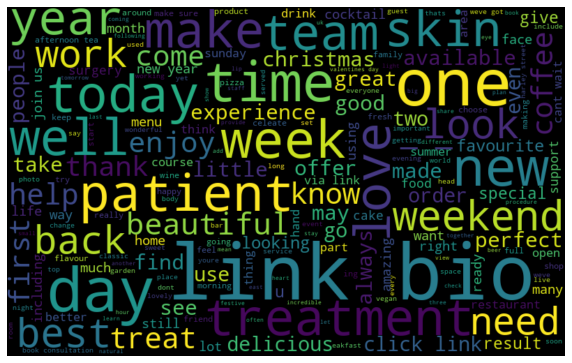

In [ ]:
#Understanding the common words used in the captions: WordCloud

all_words = ' '.join([text for text in extracted['caption']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

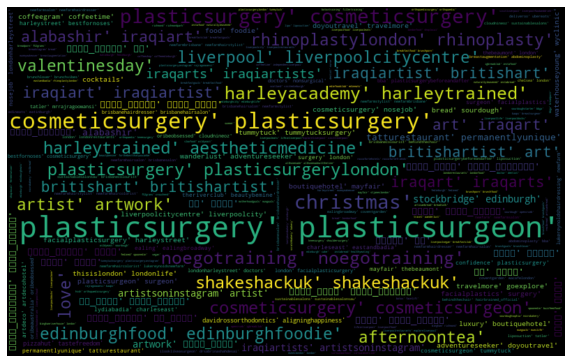

In [ ]:
# Understanding the common words used in the hashtags: WordCloud

normal_words =' '.join([text for text in extracted['hashtags']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

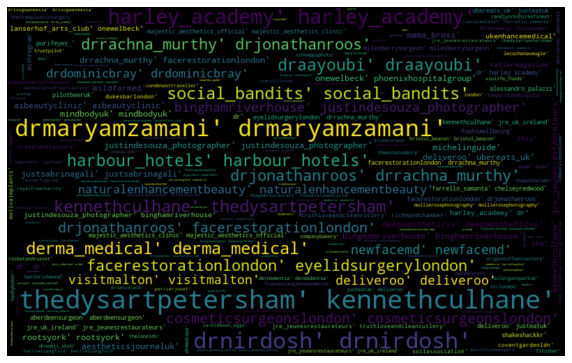

In [ ]:
# Understanding the common words used in the mentions: WordCloud

normal_words =' '.join([text for text in extracted['mentions']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
bow_caption=Feature_Extraction(extracted['caption'],4,CountVectorizer)
bow_caption
print("\n\n\n")
# bow_hashtags=Feature_Extraction(extracted['hashtags'],0,CountVectorizer)
# bow_hashtags
# print("\n\n\n")
# bow_emoji_text=Feature_Extraction(extracted['emoji_text'],0,CountVectorizer)
# bow_emoji_text
# print("\n\n\n")
# bow_mentions=Feature_Extraction(extracted['mentions'],0,CountVectorizer)
# bow_mentions
print("\n\n\n")
bow_dataset = pd.DataFrame(np.hstack((bow_caption,extracted)))
bow_dataset

c:\Users\jyoti\anaconda3\envs\nlp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


always amazing available beautiful chocolate christmas coffee consultation delicious enjoy every experience favourite first friday great happy little london looking lovely online order patient patients people perfect please procedure results share special start sunday surgery thank today treatment visit website weekend would years youre




abdominoplasty aesthetic aestheticmedicine aesthetics antiageing antiaging bakery beauty beforeandafter blepharoplasty botox boutiquehotel bread breakfast breastaugmentation breastimplants breastlift breastreduction breastsurgeon breastsurgery brunch cake christmas cocktails coffee coffeeshop confidence cosmetic cosmeticsurgeon cosmeticsurgery delicious dermalfiller dermalfillers dessert doctor edinburgh edinburghfood edinburghfoodie edinburghlife facelift fillers finedining food foodie foodphotography foodporn harleystreet hotel injectables instafood instagood juvederm lipfiller lipfillers lipo liposuction london londonfood londonhotel londonlife l

AttributeError: 'list' object has no attribute 'lower'

In [ ]:
print(len(bow_dataset.columns))
a=len(bow_dataset.columns)-28+1
print(a)
bow_dataset[len(bow_dataset.columns)-28+1]
bow_dataset.rename(columns = {a:'likes'}, inplace = True)
df=removeColumnContainString(bow_dataset)

73
46
Couldn't covert 44 to float
Couldn't covert 67 to float
Couldn't covert 69 to float


In [ ]:
df = pd.DataFrame(df)
data=df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

c:\Users\jyoti\anaconda3\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\jyoti\anaconda3\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
dropped = [8,11,14,28,31,32,33,34,49,51,52,54,55,56]
normalized_df = normalized_df.drop(dropped,axis=1)
normalized_df

,0,1,2,3,4,5,6,7,9,10,...,61,62,63,64,65,66,68,70,71,72
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.632390,0.641288,0.166667,0.000000,0.390632,0.005571
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.405556,0.584028,0.187500,0.000000,0.325148,0.008959
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.000000,0.500000,0.520833,0.000000,0.192815,0.030561
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.333333,0.625000,0.583333,0.000000,0.222374,0.029139
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.333333,0.583333,0.583333,0.057143,0.240564,0.029139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.506629,0.714015,0.125000,0.114286,0.398818,0.265825
41737,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.416667,0.745833,0.145833,0.028571,0.241473,0.141381
41738,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.510417,0.630208,0.166667,0.028571,0.217372,0.177688
41739,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.708333,0.722917,0.145833,0.000000,0.291951,0.121399


In [ ]:
y=normalized_df['likes']                #Target Variable 
X = normalized_df.drop('likes', axis=1) #Feature Matrix 

In [ ]:
x_train_bow, x_test_bow, y_train_bow, y_test_bow = train_test_split(X, y, test_size=0.2, random_state=2022)

## XGBoost

In [ ]:
# utils.hyperparameterTuning_XGBoost(x_train_bow,y_train_bow)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,subsample=0.7,random_state=random_state)
xg_reg.fit(x_train_bow, y_train_bow)
y_pred_bow = xg_reg.predict(x_test_bow)
utils.metrics(y_test_bow,y_pred_bow)

RMSE: 0.030326

R2 Score: 0.464886

MAE : 0.008738

MSE : 0.000920

RMSLE : -3.495742

max_error : 0.719729



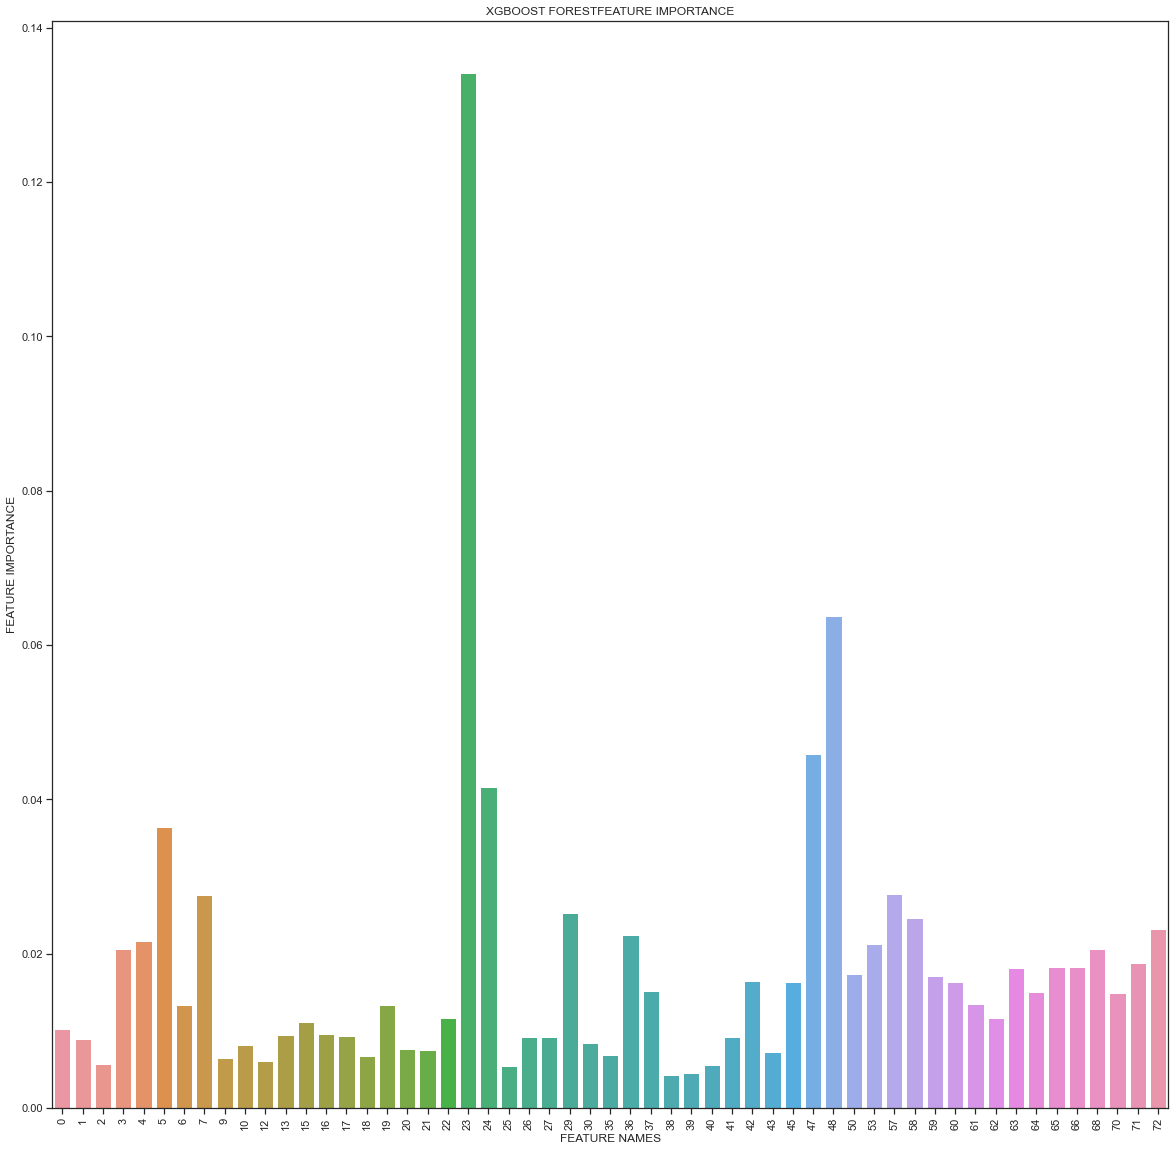

In [ ]:
utils.plot_feature_importance(xg_reg.feature_importances_,x_train_bow.columns,'XGBOOST FOREST',figurePath)

In [ ]:
utils.featureScore(xg_reg.feature_importances_)

Feature: 0, Score: 0.01030
Feature: 1, Score: 0.00889
Feature: 2, Score: 0.00572
Feature: 3, Score: 0.02055
Feature: 4, Score: 0.02165
Feature: 5, Score: 0.03646
Feature: 6, Score: 0.01341
Feature: 7, Score: 0.02766
Feature: 8, Score: 0.00654
Feature: 9, Score: 0.00820
Feature: 10, Score: 0.00611
Feature: 11, Score: 0.00947
Feature: 12, Score: 0.01117
Feature: 13, Score: 0.00956
Feature: 14, Score: 0.00929
Feature: 15, Score: 0.00672
Feature: 16, Score: 0.01337
Feature: 17, Score: 0.00766
Feature: 18, Score: 0.00747
Feature: 19, Score: 0.01168
Feature: 20, Score: 0.13416
Feature: 21, Score: 0.04159
Feature: 22, Score: 0.00548
Feature: 23, Score: 0.00917
Feature: 24, Score: 0.00916
Feature: 25, Score: 0.02524
Feature: 26, Score: 0.00838
Feature: 27, Score: 0.00692
Feature: 28, Score: 0.02246
Feature: 29, Score: 0.01515
Feature: 30, Score: 0.00430
Feature: 31, Score: 0.00458
Feature: 32, Score: 0.00553
Feature: 33, Score: 0.00922
Feature: 34, Score: 0.01649
Feature: 35, Score: 0.00731
Fe

In [ ]:
x_train_bow[29]

8502     0.0
37314    0.0
21696    0.0
15752    0.0
30775    0.0
        ... 
6384     0.0
37488    0.0
16557    0.0
1244     0.0
21373    0.0
Name: 29, Length: 33392, dtype: float64

## Random Forest

RMSE: 0.031032

R2 Score: 0.439680

MAE : 0.010153

MSE : 0.000963

RMSLE : -3.472727

max_error : 0.656579



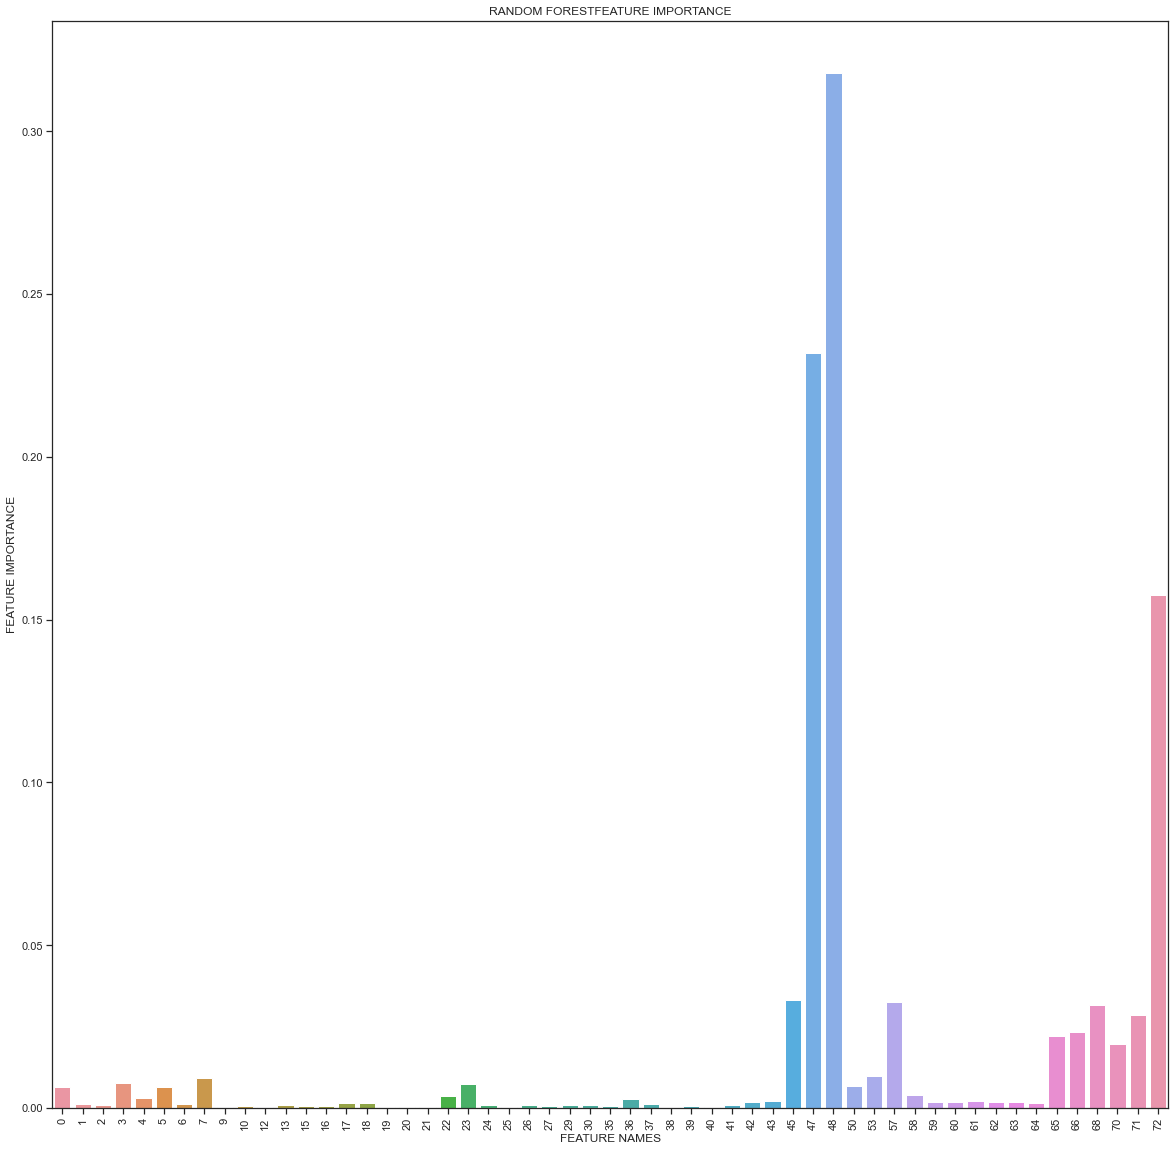

In [ ]:
# utils.hyperparameterTuning_RandomForest(x_train_bow,y_train_bow)
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train_bow, y_train_bow)
y_pred_bow = rnd_clf.predict(x_test_bow)
utils.metrics(y_test_bow,y_pred_bow)
utils.plot_feature_importance(rnd_clf.feature_importances_,x_train_bow.columns,'RANDOM FOREST',figurePath)

In [ ]:
utils.featureScore(rnd_clf.feature_importances_)

Feature: 0, Score: 0.00638
Feature: 1, Score: 0.00115
Feature: 2, Score: 0.00085
Feature: 3, Score: 0.00779
Feature: 4, Score: 0.00303
Feature: 5, Score: 0.00662
Feature: 6, Score: 0.00135
Feature: 7, Score: 0.00917
Feature: 8, Score: 0.00018
Feature: 9, Score: 0.00056
Feature: 10, Score: 0.00023
Feature: 11, Score: 0.00107
Feature: 12, Score: 0.00061
Feature: 13, Score: 0.00051
Feature: 14, Score: 0.00160
Feature: 15, Score: 0.00159
Feature: 16, Score: 0.00029
Feature: 17, Score: 0.00037
Feature: 18, Score: 0.00038
Feature: 19, Score: 0.00371
Feature: 20, Score: 0.00731
Feature: 21, Score: 0.00095
Feature: 22, Score: 0.00044
Feature: 23, Score: 0.00087
Feature: 24, Score: 0.00050
Feature: 25, Score: 0.00107
Feature: 26, Score: 0.00087
Feature: 27, Score: 0.00077
Feature: 28, Score: 0.00285
Feature: 29, Score: 0.00135
Feature: 30, Score: 0.00013
Feature: 31, Score: 0.00061
Feature: 32, Score: 0.00040
Feature: 33, Score: 0.00088
Feature: 34, Score: 0.00185
Feature: 35, Score: 0.00227
Fe

## MLP 

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_GS = MLPRegressor(activation='relu',alpha=0.001,hidden_layer_sizes=(50, 50, 50),learning_rate='constant',solver='adam',random_state=random_state)
mlp_GS.fit(x_train_bow, y_train_bow)
y_pred_mlp = mlp_GS.predict(x_test_bow)

In [ ]:
utils.metrics(y_test_bow,y_pred_mlp)

RMSE: 0.032541

R2 Score: 0.383853

MAE : 0.011144

MSE : 0.001059

RMSLE : -3.425239

max_error : 0.652475



## SVC

In [ ]:
svr= LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,tol=0.0001, verbose=0,random_state=random_state)
svr.fit(x_train_bow, y_train_bow)
y_pred_SVR = svr.predict(x_test_bow)

In [ ]:
metrics(y_test_bow,y_pred_SVR)

RMSE: 0.043741

R2 Score: -0.113218

MAE : 0.013949

MSE : 0.001913

RMSLE : -3.129477

max_error : 0.920044

